The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


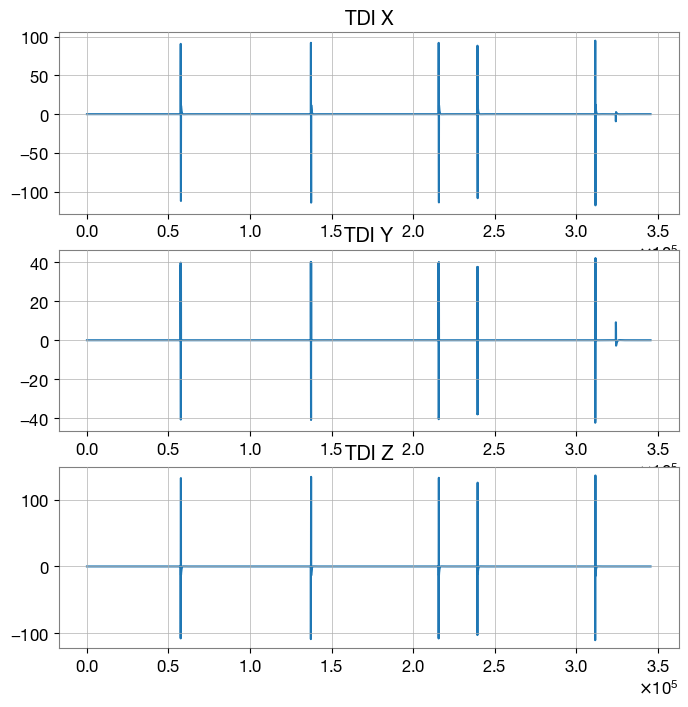

In [9]:
%load_ext autoreload
%autoreload

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
from gwpy.timeseries import TimeSeriesDict
import matplotlib.pyplot as plt
import numpy as np
import os
#LOOK INTO GRAPHING STRAIGHT SIMULATION DATA
h5_path = os.path.join(os.getcwd(), "dist/lisa_data/tdi_data/default_tdi_output.h5")
# h5_path = os.path.join(os.getcwd(), "measurements.h5")

obs_tdi = TimeSeriesDict.read(h5_path)
obs_tdi["T"] = (obs_tdi["X"] + obs_tdi["Y"] + obs_tdi["Z"]) / np.sqrt(3.0)
obs_tdi["E"] = (obs_tdi["X"] - 2.0 * obs_tdi["Y"] + obs_tdi["Z"]) / np.sqrt(6.0)
obs_tdi["EV"] = (obs_tdi["Y"] - 2.0 * obs_tdi["Z"] + obs_tdi["X"]) / np.sqrt(6.0)
obs_tdi["A"] = (obs_tdi["Z"] - obs_tdi["X"]) / np.sqrt(2.0)

# load injected times
input_glitches_fname = os.path.join(os.getcwd(), "dist/glitch_data/gw_test.txt")

# input_glitches_data = np.genfromtxt(input_glitches_fname)
# input_glitch_times = input_glitches_data[1:, 5]
# input_glitch_beta = input_glitches_data[1:, 7]
# input_glitch_amplitudes = input_glitches_data[1:, -1]
# input_glitch_all = {'time': input_glitch_times, 'level': input_glitch_amplitudes, 'beta': input_glitch_beta}
# print(input_glitch_times)
# obs_tdi["X"].plot()
# obs_tdi["Y"].plot()
# obs_tdi["Z"].plot()
# plot_all_four(obs_tdi, glitch_times_inject=input_glitch_times)

figure, axis = plt.subplots(3, 1, figsize=(8, 8))
index = 86400 * 4
axis[0].plot(range(len(obs_tdi["X"]))[:index], obs_tdi["X"][:index])
axis[0].set_title("TDI X")

axis[1].plot(range(len(obs_tdi["Y"]))[:index], obs_tdi["Y"][:index])
axis[1].set_title("TDI Y")

axis[2].plot(range(len(obs_tdi["Z"]))[:index], obs_tdi["Z"][:index])
axis[2].set_title("TDI Z")

plt.show()